# Katelyn's Metric: Best Neighborhood Based on Number of Parks

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import geopandas as gd

In [5]:
#read data file and drop columns with no data
parks = pd.read_csv("parks.csv")
parks = parks.dropna()

#open file and read data
import csv
with open ("parks.csv") as f:
    parks = [row for row in csv.reader(f)]
    
#count how many parks are in each neighborhood
park_counter = dict()
for row in parks[2:]:
    neighborhood = row[5]
    
    if neighborhood not in park_counter:
        park_counter[neighborhood] = 1
    else:
        park_counter[neighborhood] = park_counter[neighborhood] + 1
        
park_counter  

{'Crawford-Roberts': 3,
 'North Shore': 3,
 'Allegheny Center': 2,
 'Central Business District': 10,
 'Central Northside': 3,
 'Beechview': 7,
 'East Liberty': 12,
 'Bedford Dwellings': 1,
 'South Side Slopes': 7,
 'South Side Flats': 6,
 'Lower Lawrenceville': 3,
 'Banksville': 2,
 'South Oakland': 5,
 'Homewood North': 2,
 'Hazelwood': 6,
 'Bon Air': 1,
 'Central Oakland': 4,
 'Brighton Heights': 4,
 'Brookline': 3,
 'Spring Garden': 2,
 'Lincoln-Lemington-Belmar': 3,
 'Windgap': 1,
 'Troy Hill': 5,
 'Westwood': 3,
 'Perry South': 2,
 'Homewood West': 1,
 'Squirrel Hill South': 6,
 'Strip District': 2,
 'Arlington': 1,
 'Stanton Heights': 1,
 'Crafton Heights': 2,
 'Upper Lawrenceville': 3,
 'East Carnegie': 1,
 'East Hills': 1,
 'Point Breeze': 7,
 'Allentown': 2,
 'Duquesne Heights': 2,
 'Mount Washington': 6,
 'Esplen': 1,
 'Fairywood': 1,
 'Fineview': 2,
 'Garfield': 3,
 'Greenfield': 3,
 'Larimer': 3,
 'Bloomfield': 3,
 'Perry North': 2,
 'North Oakland': 1,
 'Hays': 1,
 'Elliot

In [6]:
#create dictionary for neighborhoods and number of parks
neighborhoods = []
number_of_parks = []
items = park_counter.items()
for item in items:
    neighborhoods.append(item[0]), number_of_parks.append(item[1])
    
#create dataframe using new dictionaries
park_df = pd.DataFrame({"neighborhood":neighborhoods,"number of parks":number_of_parks})

#sort dataframe 
park_df.sort_values(by = "number of parks", ascending = False)

,neighborhood,number of parks
6,East Liberty,12
3,Central Business District,10
34,Point Breeze,7
5,Beechview,7
8,South Side Slopes,7
...,...,...
47,Hays,1
28,Arlington,1
29,Stanton Heights,1
51,Morningside,1


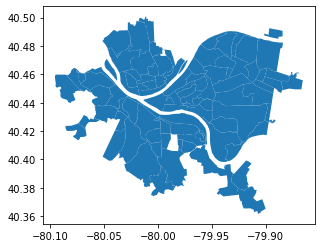

In [7]:
#load shape file
neighborhoods = gd.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/dbd133a206c")
neighborhoods.plot()

In [8]:
#merge new dataframe with shape file
parks_map = neighborhoods.merge(park_df, how = 'left', left_on='hood', right_on='neighborhood')
parks_map[['hood','number of parks','geometry']]

,hood,number of parks,geometry
0,Chateau,NaN,"POLYGON ((-80.02999 40.45909, -80.02989 40.458..."
1,Summer Hill,NaN,"POLYGON ((-80.01078 40.49975, -80.01073 40.499..."
2,Northview Heights,NaN,"POLYGON ((-80.00327 40.48271, -80.00325 40.482..."
3,Spring Hill-City View,3.0,"POLYGON ((-79.99761 40.47460, -79.99761 40.474..."
4,Perry South,2.0,"POLYGON ((-80.01422 40.47745, -80.01435 40.477..."
...,...,...,...
85,Overbrook,NaN,"POLYGON ((-79.99633 40.39458, -79.99630 40.394..."
86,Chartiers City,NaN,"POLYGON ((-80.06919 40.46046, -80.06912 40.460..."
87,Esplen,1.0,"POLYGON ((-80.05154 40.46364, -80.05140 40.463..."
88,Ridgemont,NaN,"POLYGON ((-80.03431 40.43366, -80.03424 40.433..."


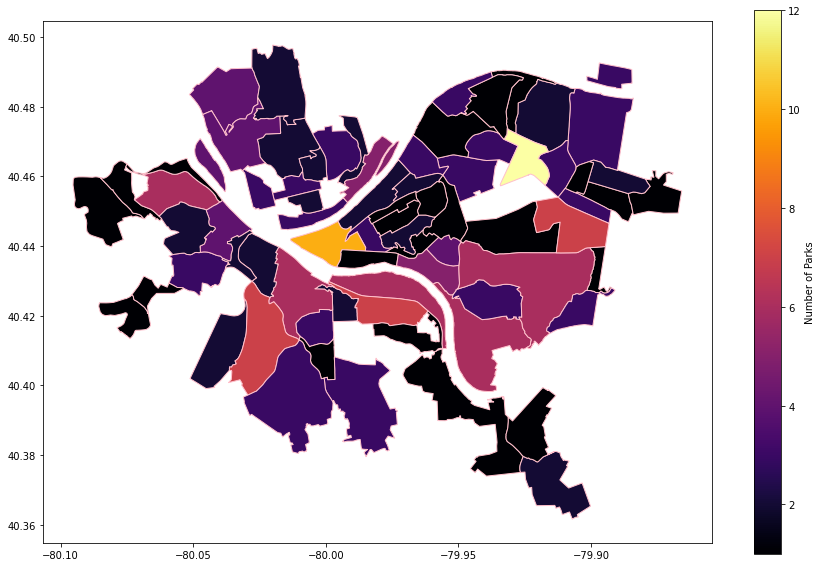

In [10]:
#create map
parks_map.plot(column='number of parks', cmap = 'inferno', edgecolor="pink", legend=True, 
               legend_kwds={'label': "Number of Parks"}, figsize = (15, 10))


According to the data, the best neighborhood based on having the most number of parks is East Liberty with 12 parks. 